In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("data final.csv", sep=';')
df2 = pd.read_csv("planning.csv", sep=";" )
df3 = pd.read_csv("awards_.csv", sep=";" )


C:\Users\User\AppData\Local\Temp\ipykernel_14044\936009114.py:1: DtypeWarning: Columns (18,22,23,24,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data final.csv", sep=';')
C:\Users\User\AppData\Local\Temp\ipykernel_14044\936009114.py:2: DtypeWarning: Columns (7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("planning.csv", sep=";" )
C:\Users\User\AppData\Local\Temp\ipykernel_14044\936009114.py:3: DtypeWarning: Columns (3,4,6,7,9,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv("awards_.csv", sep=";" )


In [3]:
x=df.loc[:,["value_amount","numberOfTenderers"]]
x["budget_amount"]=df2["budget_amount"]
x["amount"]=df3["amount"]

In [4]:
x

,value_amount,numberOfTenderers,budget_amount,amount
0,19986.85,49.0,19986.85,24706.08
1,NaN,5.0,NaN,174.72
2,NaN,2.0,NaN,90.72
3,NaN,3.0,NaN,916.61
4,NaN,5.0,NaN,80.81
...,...,...,...,...
953928,18.98,NaN,NaN,NaN
953929,28823.77,1.0,NaN,NaN
953930,7589.29,1.0,NaN,NaN
953931,30590.89,1.0,NaN,NaN


In [5]:
x.dropna(inplace=True)

In [6]:
x.dtypes

value_amount          object
numberOfTenderers    float64
budget_amount        float64
amount                object
dtype: object

In [7]:
value_amount1=[]
amount1=[]

for i in x["value_amount"]:
    str(i).isdigit() == True
    value_amount1.append(i)

    
for i in x["amount"]:
    str(i).isdigit() == True
    amount1.append(i)

In [8]:
x["value_amount"]=pd.DataFrame(value_amount1)
x["amount"]=pd.DataFrame(amount1)

In [9]:
x.dropna(inplace=True)

In [10]:
x["value_amount"]=x["value_amount"].astype("float")
x["amount"]=x["amount"].astype("float")

In [11]:
x.dtypes

value_amount         float64
numberOfTenderers    float64
budget_amount        float64
amount               float64
dtype: object

In [12]:
X=x.loc[:,["value_amount","budget_amount","amount"]]


In [13]:
q1= X["budget_amount"].quantile(0.25)
q3= X["budget_amount"].quantile(0.75)
iqr= q3-q1
X=X.loc[ ~((X["budget_amount"]> (q3+(1.5*iqr)) ) | (X["budget_amount"]< (q1-(1.5*iqr)) )) ] 

In [14]:
q1= X["amount"].quantile(0.25)
q3= X["amount"].quantile(0.75)
iqr= q3-q1
X=X.loc[ ~((X["amount"]> (q3+(1.5*iqr)) ) | (X["amount"]< (q1-(1.5*iqr)) )) ] 

In [15]:
q1= X["value_amount"].quantile(0.25)
q3= X["value_amount"].quantile(0.75)
iqr= q3-q1
X=X.loc[ ~((X["value_amount"]> (q3+(1.5*iqr)) ) | (X["value_amount"]< (q1-(1.5*iqr)) )) ] 

In [16]:
sc = StandardScaler()

In [17]:
sc.fit(X)

StandardScaler()

In [18]:
X_norm = sc.transform(X)

In [19]:
clusters = np.arange(2,10)

In [20]:
inercias = []
for k in clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_norm)
    inercias.append(kmeans.inertia_)

In [21]:
eva = pd.DataFrame({"K":clusters, "inercia":inercias})

<AxesSubplot:xlabel='K', ylabel='inercia'>

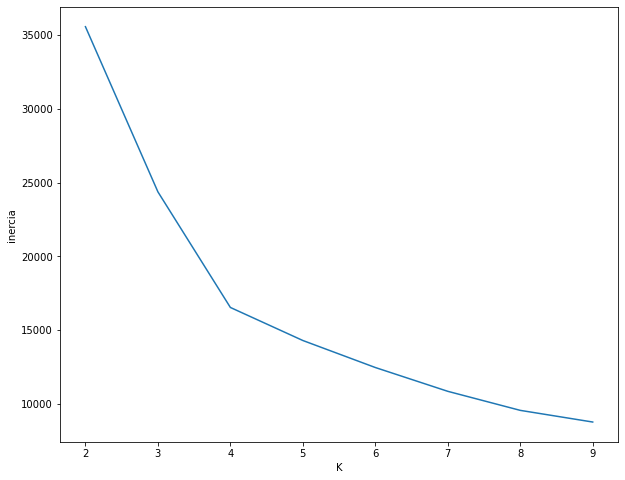

In [22]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(data = eva, x = "K", y = "inercia")

In [23]:
kmeans = KMeans(n_clusters=4, random_state=0)

In [24]:
kmeans.fit(X_norm)

KMeans(n_clusters=4, random_state=0)

In [25]:
X["cluster"] = kmeans.labels_

In [26]:
X

,value_amount,budget_amount,amount,cluster
6,4162.73,38400.00,8.33,2
7,106996.14,16040.00,83.78,0
9,7149.96,52660.49,16.58,2
41,14881.00,801.43,67.20,2
42,26265.00,600.00,224.00,2
...,...,...,...,...
25759,6696.43,10366.65,55.44,2
25760,1850.83,55340.67,5.71,2
25762,24711.76,15887.27,402.08,3
25766,114750.00,73333.26,1.12,0


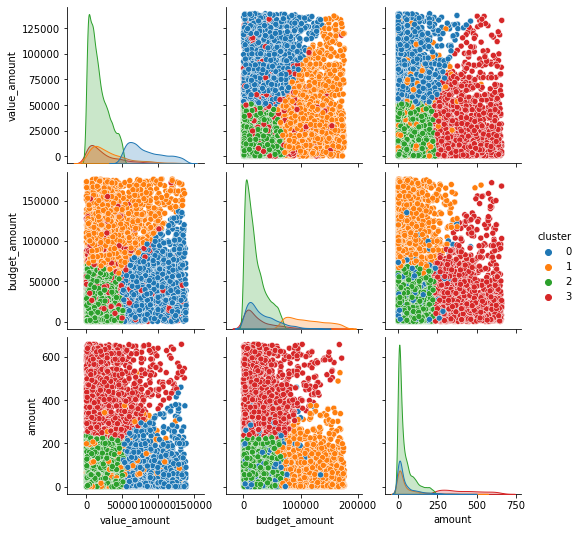

In [27]:
sns.pairplot(X,hue="cluster", palette="tab10")

<AxesSubplot:xlabel='cluster', ylabel='value_amount'>

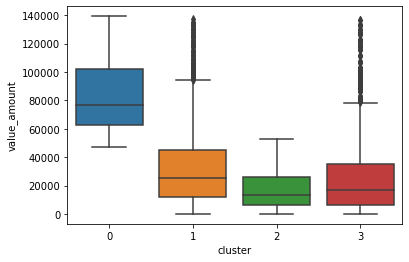

In [28]:
sns.boxplot(x="cluster", y="value_amount", data=X)

<AxesSubplot:xlabel='cluster', ylabel='budget_amount'>

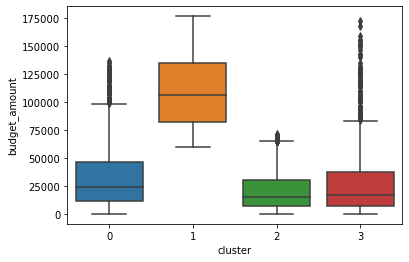

In [29]:
sns.boxplot(x="cluster", y="budget_amount", data=X)

<AxesSubplot:xlabel='cluster', ylabel='amount'>

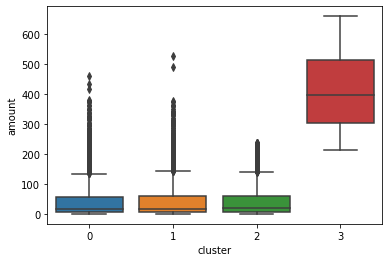

In [30]:
sns.boxplot(x="cluster", y="amount", data=X)

value_amount (Valor que excede lo presupuestado)= El valor estimado superior total de la adquisición

amount (El valor del premio)= El valor total de este premio.

budget_amount(El presupuestado para la licitación)= El valor reservado en el presupuesto para este proceso de contratación. 

Grupo 1: Licitaciones subestimadas
Exceso alto
Presupuesto bajo
Premio Bajo

Grupo 2: Licitaciones sobre estimadas
Exceso bajo
Presupuesto alto
Premio Bajo

Grupo 3: Licitaciones estandar
Exceso bajo
Presupuesto bajo
Premio Bajo

Grupo 4: Licitaciones incongruentes 
Exceso bajo
Presupuesto bajo
Premio alto

In [31]:
X.reset_index(drop= True, inplace=True)
X

,value_amount,budget_amount,amount,cluster
0,4162.73,38400.00,8.33,2
1,106996.14,16040.00,83.78,0
2,7149.96,52660.49,16.58,2
3,14881.00,801.43,67.20,2
4,26265.00,600.00,224.00,2
...,...,...,...,...
16122,6696.43,10366.65,55.44,2
16123,1850.83,55340.67,5.71,2
16124,24711.76,15887.27,402.08,3
16125,114750.00,73333.26,1.12,0


In [60]:
Grupo=[]
for n in X["cluster"]:
    if str(n)=="0":
        Grupo.append("Licitaciones con recursos escasos")
        
    if str(n)=="1":
        Grupo.append("Licitaciones con recursos elevados")
     
    if str(n)=="2":
        Grupo.append("Licitaciones estandar")
    if str(n)=="3":
        Grupo.append("Licitaciones incongruentes")
   
    

In [61]:
X["cluster"].dtypes

dtype('int32')

In [62]:
X["Grupo"]=pd.DataFrame(Grupo)
X

,value_amount,budget_amount,amount,cluster,Grupo
0,4162.73,38400.00,8.33,2,Licitaciones estandar
1,106996.14,16040.00,83.78,0,Licitaciones con recursos escasos
2,7149.96,52660.49,16.58,2,Licitaciones estandar
3,14881.00,801.43,67.20,2,Licitaciones estandar
4,26265.00,600.00,224.00,2,Licitaciones estandar
...,...,...,...,...,...
16122,6696.43,10366.65,55.44,2,Licitaciones estandar
16123,1850.83,55340.67,5.71,2,Licitaciones estandar
16124,24711.76,15887.27,402.08,3,Licitaciones incongruentes
16125,114750.00,73333.26,1.12,0,Licitaciones con recursos escasos


In [63]:
X1 = X.drop('cluster', axis=1)

In [64]:
X1

,value_amount,budget_amount,amount,Grupo
0,4162.73,38400.00,8.33,Licitaciones estandar
1,106996.14,16040.00,83.78,Licitaciones con recursos escasos
2,7149.96,52660.49,16.58,Licitaciones estandar
3,14881.00,801.43,67.20,Licitaciones estandar
4,26265.00,600.00,224.00,Licitaciones estandar
...,...,...,...,...
16122,6696.43,10366.65,55.44,Licitaciones estandar
16123,1850.83,55340.67,5.71,Licitaciones estandar
16124,24711.76,15887.27,402.08,Licitaciones incongruentes
16125,114750.00,73333.26,1.12,Licitaciones con recursos escasos


In [65]:
I = X1.loc[:,["value_amount","budget_amount","amount"]]
D = X1["Grupo"]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(I, D, test_size=0.30, random_state=42)

In [67]:
scaler = StandardScaler()

In [68]:
Xnorm=scaler.fit_transform(X_train)

In [69]:
clf = LogisticRegression(random_state=0)

In [70]:
clf.fit(Xnorm,y_train)

LogisticRegression(random_state=0)

In [71]:
Xnormtest = scaler.transform(X_test)

In [72]:
clf.score(Xnormtest,y_test)

0.9958669146517876

In [73]:
y_test.value_counts()

Licitaciones estandar                 2895
Licitaciones con recursos escasos      814
Licitaciones con recursos elevados     624
Licitaciones incongruentes             506
Name: Grupo, dtype: int64

In [74]:
y_pred = clf.predict(Xnormtest)

In [75]:
confusion_matrix(y_test, y_pred)

array([[ 615,    3,    6,    0],
       [   0,  810,    4,    0],
       [   1,    0, 2892,    2],
       [   0,    1,    3,  502]], dtype=int64)